# import necessary files for training 

In [1]:
from keras.datasets import reuters
from keras import models,layers,regularizers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# read and pretrain data

In [2]:
(traindata,trainlabel),(testdata,testlabel) = reuters.load_data(num_words=10000,test_split=0.2)

# Change the nature of data for processing

In [3]:
def vec_sec(sec,dim = 10000):
    resalts = np.zeros((len(sec),dim))
    for i , sec in enumerate(sec):
        resalts[i,sec] = 1.
    return resalts

# Change labels onehot

In [4]:
def to_one_hot(labels,dimention = 46):
    resalts = np.zeros((len(labels),dimention))
    for i , labels in enumerate(labels):
        resalts[i,labels] = 1.
    return resalts

In [5]:
train_y = to_one_hot(trainlabel)

In [6]:
test_y = to_one_hot(testlabel)

In [7]:
train_x = vec_sec(traindata)

In [8]:
test_x = vec_sec(testdata)

# Separate train and validation

In [9]:
pre_train_x = train_x[1000:]
pre_train_y = train_y[1000:]
val_x =train_x[:1000]
val_y = train_y[:1000]

# create model for train 

In [32]:
model = models.Sequential()
model.add(layers.Dense(256, kernel_regularizer= regularizers.l2(0.0001) ,activation='relu',input_shape=(10000,)))
model.add(layers.Dropout(0.52))
model.add(layers.Dense(46,activation='sigmoid'))

# compile model with Specific optimizer and lost function

In [33]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

# fit model for train 

In [34]:
history = model.fit(pre_train_x,pre_train_y,epochs=4,batch_size=64 , validation_data=(val_x,val_y))

Train on 7982 samples, validate on 1000 samples
Epoch 1/4
7982/7982 [==============================] - 13s 2ms/step - loss: 1.8670 - acc: 0.6077 - val_loss: 1.0547 - val_acc: 0.7810
Epoch 2/4
7982/7982 [==============================] - 11s 1ms/step - loss: 0.8889 - acc: 0.8142 - val_loss: 0.9105 - val_acc: 0.8160
Epoch 3/4
7982/7982 [==============================] - 11s 1ms/step - loss: 0.6497 - acc: 0.8685 - val_loss: 0.8726 - val_acc: 0.8270
Epoch 4/4
7982/7982 [==============================] - 11s 1ms/step - loss: 0.5264 - acc: 0.8955 - val_loss: 0.8124 - val_acc: 0.8300


# predict new data from trained model

In [35]:
predict = model.predict(test_x)

# predict prcent

In [36]:
count = 0
for i in range(len(predict)):
    if np.argmax(predict[i]) == np.argmax(test_y[i]):
        count += 1
print('predict = '+str(round((count*100)/len(predict),3))+'%')

predict = 81.345%


# show loss and accuracy data in chart

In [15]:
history_dict = history.history

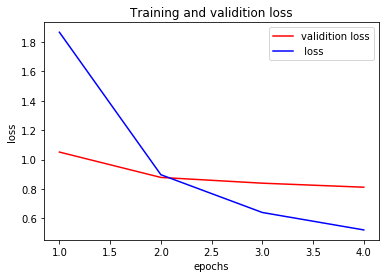

In [16]:
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs ,history_dict['val_loss'],'r-',label='validition loss')
plt.plot(epochs ,history_dict['loss'],'b',label=' loss')
plt.title('Training and validition loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

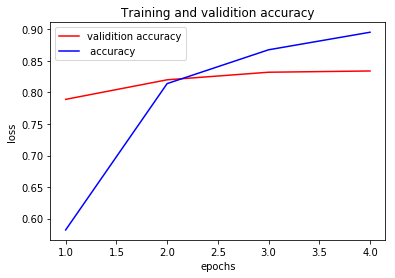

In [17]:
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs ,history_dict['val_acc'],'r-',label='validition accuracy')
plt.plot(epochs ,history_dict['acc'],'b',label=' accuracy')
plt.title('Training and validition accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
#github.com/aidinze